<a href="https://colab.research.google.com/github/superdakkelman/funky-funk/blob/main/OCAMPO_Model_Evaluation_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas numpy matplotlib

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import KFold

model = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-validation scores: ", scores)
print("Mean accuracy: ", np.mean(scores))

# Analysis:
# Cross-validation measures the accuracy between two different groups, using a training set and a testing set
# We take the mean accuracy to accurately measure the multiple data points given.

Cross-validation scores:  [1.         1.         0.93333333 0.93333333 0.93333333]
Mean accuracy:  0.9600000000000002


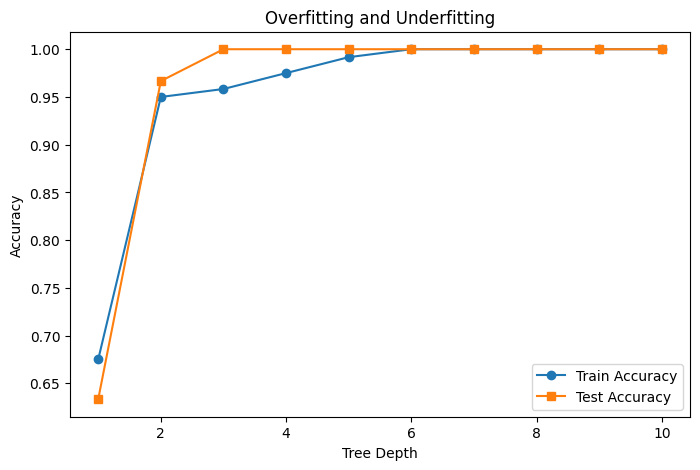

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []
depths = range(1, 11)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting and Underfitting")
plt.show()

# Analysis
# When the depth is too small, the accuracy is low
# When the depth is too large, the accuracy cannot be determined.
# To determine an optimal depth, the accuracy must be levelled.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get accuracies
log_train_acc = accuracy_score(y_train, log_model.predict(X_train))
log_test_acc = accuracy_score(y_test, log_model.predict(X_test))
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Logistic Regression - Train: {log_train_acc:.3f}, Test: {log_test_acc:.3f}")
print(f"Random Forest - Train: {rf_train_acc:.3f}, Test: {rf_test_acc:.3f}")

# Analysis
# The random forest model has the higher training accuracy.
# The logistic regression generalizes better due to its higher range.
# This relates to the bias-variance tradeoff due to it describing each model's complexity.

Logistic Regression - Train: 0.975, Test: 1.000
Random Forest - Train: 1.000, Test: 1.000
